In [189]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pingouin import corr



In [190]:
df = pd.read_csv("BTC-USD.csv")
arimadt = pd.read_csv("BTC-USD.csv")
dfMes=df
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400
1,2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700
2,2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200
3,2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500
4,2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096


In [191]:
dfMes['month']=pd.to_datetime(dfMes['Date']).dt.month
dfMes['year']=pd.to_datetime(dfMes['Date']).dt.year
dfMes

,Date,Open,High,Low,Close,Adj Close,Volume,month,year
0,2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400,10,2014
1,2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700,10,2014
2,2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200,10,2014
3,2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500,10,2014
4,2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096,10,2014
...,...,...,...,...,...,...,...,...,...
2282,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704,12,2020
2283,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848,12,2020
2284,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,1,2021
2285,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,1,2021


In [192]:
def RetornarMedia(velor):
    resultado=0.0
    for i in range( len(velor)):
        resultado+=velor[i];


    return resultado/i


def FazerMatematia(df, w):
    x = 0
    velor = []
    resultado =[]
    for ind in range(2286-1):
        if w == 1:
            if df['month'].loc[ind] == df['month'].loc[ind+1]:
                velor.append(df['Close'].loc[ind])
            else:
                resultado.append(RetornarMedia(velor))    
                velor.clear()
        else:
            if df['year'].loc[ind] == df['year'].loc[ind+1]:
                velor.append(df['Close'].loc[ind])
            else:
                resultado.append(RetornarMedia(velor))    
                velor.clear()
                      
    return resultado


In [193]:
df.Close.rolling(3).sum()

retornar =FazerMatematia(df,1)
dt = pd.DataFrame()
dt['Close']=retornar
dt


,Close
0,377.596346
1,378.748106
2,353.762448
3,258.441206
4,242.386117
...,...
70,12053.220669
71,11036.564802
72,12231.563073
73,17133.817383


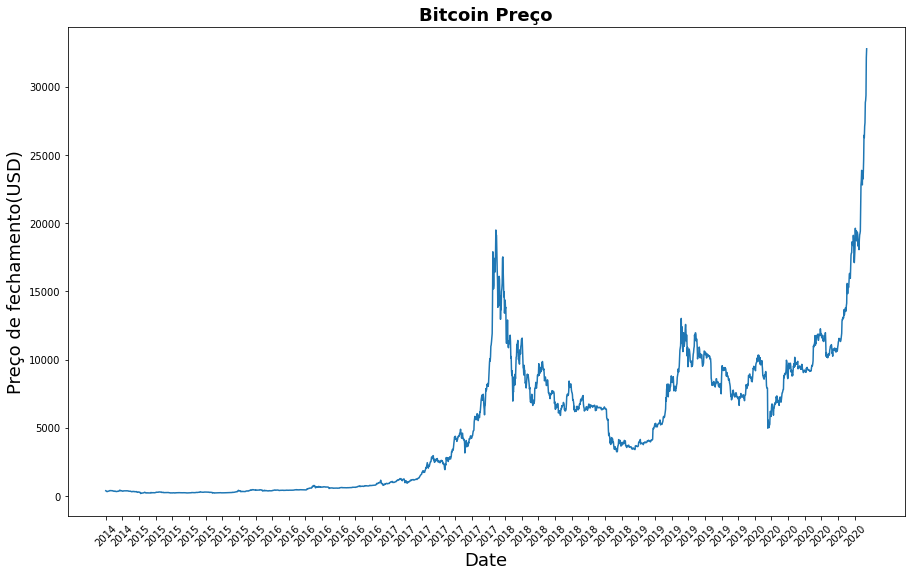

In [194]:
preco=df[["Close"]]
#preco=retornar
plt.figure(figsize=(15,9))
plt.plot(preco)
plt.xticks(range(0,df.shape[0],50),df["year"].loc[::50],rotation=45)
plt.title("Bitcoin Preço",fontsize =18, fontweight='bold')
plt.xlabel('Date',fontsize =18)
plt.ylabel('Preço de fechamento(USD)',fontsize =18)
plt.show()

In [195]:
retornarYY =FazerMatematia(df,2)
dtYY = pd.DataFrame()
dtYY['Close']=retornarYY


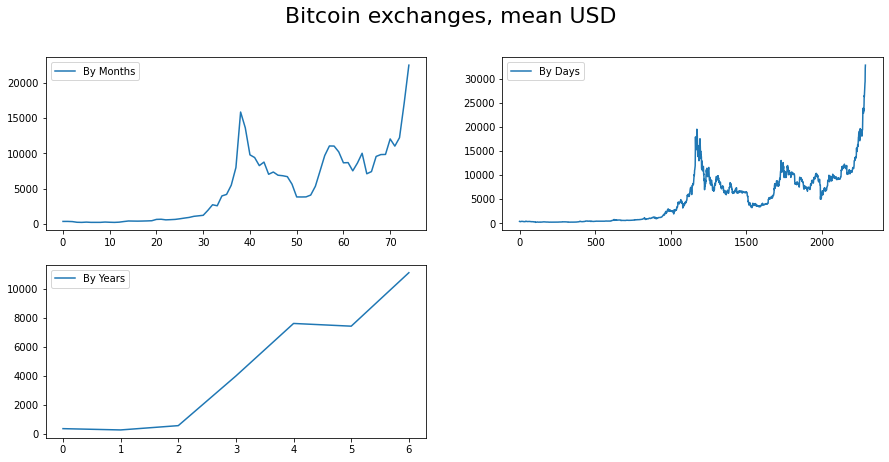

In [196]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)
plt.subplot(221)
plt.plot(dt.Close, '-', label='By Months')
plt.legend()

plt.subplot(222)
plt.plot(df.Close, '-', label='By Days')
plt.legend()

plt.subplot(223)
plt.plot(dtYY .Close, '-', label='By Years')
plt.legend()

plt.show()

In [197]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler()
#preco=dt[["Close"]]
norm_data= min_max_scaler.fit_transform(preco.values)
norm_data

array([[0.00630329],
       [0.00604127],
       [0.00556402],
       ...,
       [0.89547665],
       [0.97991788],
       [1.        ]])

In [198]:
def univariate_data(dataset,start_index,end_index,history_size,target_size):
    data=[]
    labels=[]

    start_index=start_index+history_size
    if end_index is None:
        end_index=len(dataset)-target_size

    for i in range(start_index,end_index):
        indices=range(i-history_size,i)
        data.append(np.reshape(dataset[indices], (history_size,1)))
        labels.append(dataset[i+target_size])
    return np.array(data),np.array(labels)      


past_history=5
future_target=0

TRAIN_SPLIT=int(len(norm_data)*0.7)

x_train,y_train = univariate_data(norm_data,0,TRAIN_SPLIT,past_history,future_target)

x_test,y_test=univariate_data(norm_data,TRAIN_SPLIT,None,past_history,future_target)

In [199]:
import keras

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout


num_units =62

learning_rate = 0.005
activatio_fuction = 'sigmoid'
adam = Adam(lr=learning_rate)

loss_fuction = 'mse'

batch_size = 3
num_epochs = 50


model = Sequential()

model.add(LSTM(units=num_units, activation=activatio_fuction, input_shape=(None,1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss=loss_fuction)



c:\Users\Quebec\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [200]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 62)                15872     
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 62)                0         
                                                                 
 dropout_12 (Dropout)        (None, 62)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 63        
                                                                 
Total params: 15,935
Trainable params: 15,935
Non-trainable params: 0
_________________________________________________________________


In [201]:
history=model.fit(x_train,y_train,validation_split=0.01,batch_size=batch_size,epochs=num_epochs,shuffle=False)

Epoch 1/50
527/527 [==============================] - 2s 3ms/step - loss: 0.0144 - val_loss: 4.2463e-04
Epoch 2/50
527/527 [==============================] - 1s 2ms/step - loss: 0.0068 - val_loss: 1.9928e-04
Epoch 3/50
527/527 [==============================] - 1s 2ms/step - loss: 0.0040 - val_loss: 8.8258e-06
Epoch 4/50
527/527 [==============================] - 1s 2ms/step - loss: 0.0029 - val_loss: 1.0580e-05
Epoch 5/50
527/527 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 6.6212e-05
Epoch 6/50
527/527 [==============================] - 1s 2ms/step - loss: 0.0021 - val_loss: 8.9485e-05
Epoch 7/50
527/527 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss: 2.3347e-04
Epoch 8/50
527/527 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss: 1.4218e-04
Epoch 9/50
527/527 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 2.8364e-04
Epoch 10/50
527/527 [==============================] - 1s 2ms/st

22/22 [==============================] - 0s 1ms/step


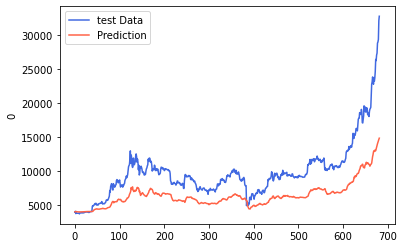

In [202]:
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
prediction = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))
ax=sns.lineplot(x=original.index,y=original[0],label='test Data', color='royalblue')
ax=sns.lineplot(x=prediction.index,y=prediction[0],label='Prediction', color='tomato')


In [203]:
df['original']=original
df['prediction']=prediction
cof = df[['original','prediction']].dropna()
cof.corr()


,original,prediction
original,1.000000,0.986909
prediction,0.986909,1.000000


In [204]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from math import sqrt
import statsmodels.api as sm

price = arimadt.Close

X = price.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=3631.728314, expected=3673.836182
predicted=3677.797192, expected=3915.714355
predicted=3932.599626, expected=3947.094482
predicted=3939.960836, expected=3999.820557
predicted=3998.342791, expected=3954.118164
predicted=3934.105774, expected=4005.526611
predicted=4008.892776, expected=4142.526855
predicted=4148.555085, expected=3810.427490
predicted=3782.156424, expected=3882.696289
predicted=3896.106823, expected=3854.357910
predicted=3843.959766, expected=3851.047363
predicted=3870.954559, expected=3854.785400
predicted=3851.122988, expected=3859.583740
predicted=3861.523068, expected=3864.415039
predicted=3864.783143, expected=3847.175781
predicted=3845.419377, expected=3761.557129
predicted=3755.265436, expected=3896.375000
predicted=3909.638577, expected=3903.942627
predicted=3901.370527, expected=3911.484375
predicted=3915.848255, expected=3901.131592
predicted=3892.024031, expected=3963.313721
predicted=3967.955630, expected=3951.599854
predicted=3948.110649, expected=

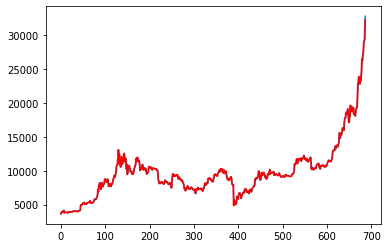

In [205]:

for t in range(len(test)):
	model = sm.tsa.ARIMA(history, order=(4,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 395.579


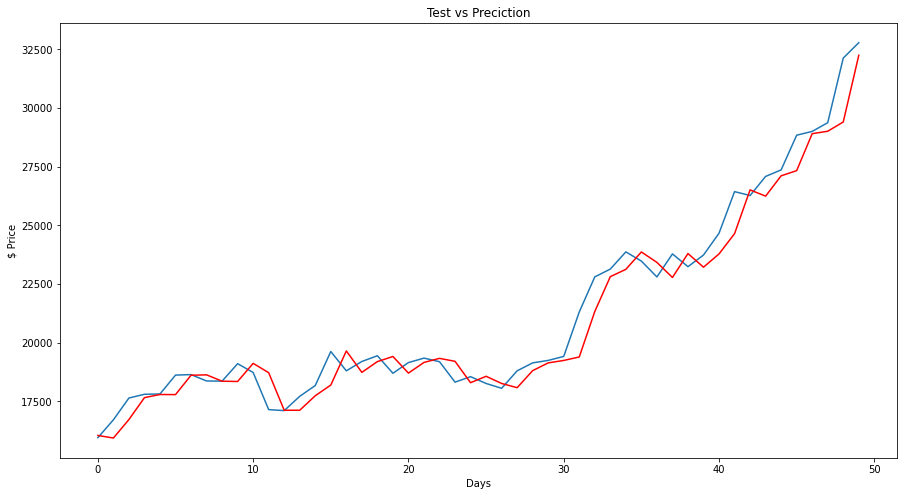

In [206]:
plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test[-50:], label="Test")
plt.plot(predictions[-50:], color='red',label='Predicao')
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.title('Test vs Preciction')
plt.show()

In [207]:
resultados = pd.DataFrame()
resultados['original']=predictions
resultados['prediction']=test
cofArrr = resultados[['original','prediction']].dropna()
cofArrr.corr()

,original,prediction
original,1.00000,0.99558
prediction,0.99558,1.00000
